In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '8'

In [2]:
import numpy as np
import torch
from model import Generator, Discriminator
from matplotlib import pyplot as plt
from pca_edit_tools import *

In [3]:
ckpt = torch.load('/work/dante/scripts/others/stylegan2-pytorch/checkpoint/070000.pt', map_location=lambda storage, loc: storage)

In [4]:
device = "cuda"

In [5]:
# generator = Generator(
#     256, 512, 8, channel_multiplier=2
# ).to(device)

# generator.load_state_dict(ckpt["g"])
# generator.eval();

In [6]:
g_ema = Generator(
    256, 512, 8, channel_multiplier=2
).to(device)
g_ema.load_state_dict(ckpt["g_ema"])
g_ema.eval();

In [7]:
sample_z = torch.randn(64, 512, device=device)

In [8]:
with torch.no_grad():
    sample, _ = g_ema([sample_z])

/work/dante/scripts/others/stylegan2-pytorch/op/conv2d_gradfix.py:89: UserWarning: conv2d_gradfix not supported on PyTorch 1.4.0. Falling back to torch.nn.functional.conv2d().
  f"conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d()."


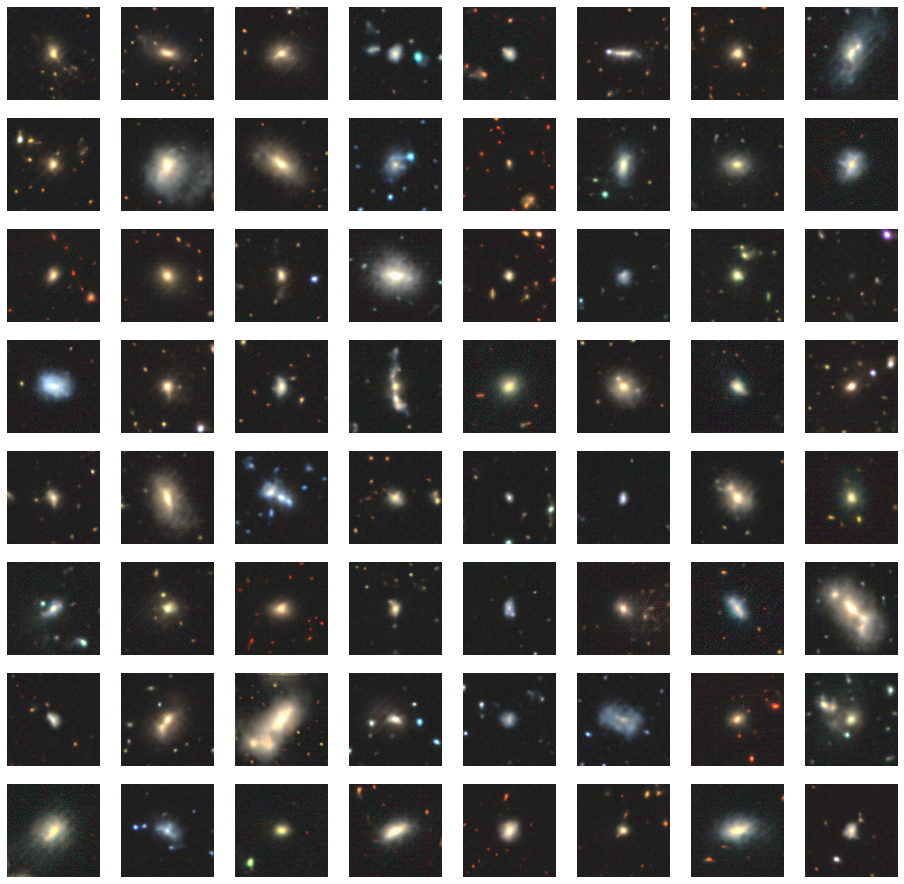

In [9]:
gridplot(8,8,samples_to_images(sample))

In [10]:
pca_of_w_tensor,w_10_in_pca,w_90_in_pca=calculate_PCA_of_w(g_ema,1000)
sample_z = torch.randn(1, 512, device=device)

In [11]:
ori_gal,gals=edit_gan(sample_z,g_ema,pca_of_w_tensor,w_10_in_pca,w_90_in_pca,edit_axis=0,edit_num=20)

/work/dante/scripts/others/stylegan2-pytorch/op/conv2d_gradfix.py:89: UserWarning: conv2d_gradfix not supported on PyTorch 1.4.0. Falling back to torch.nn.functional.conv2d().
  f"conv2d_gradfix not supported on PyTorch {torch.__version__}. Falling back to torch.nn.functional.conv2d()."


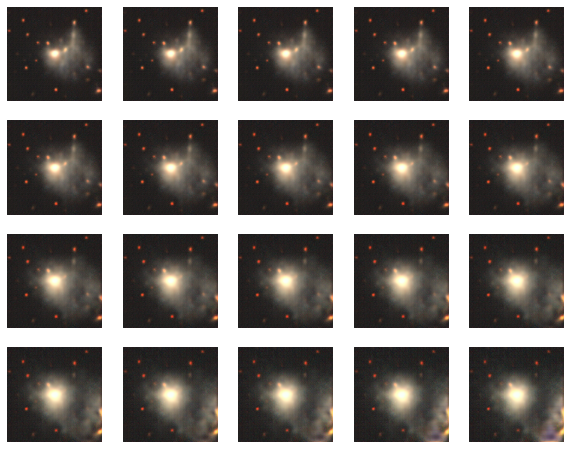

In [12]:
gridplot(4,5,samples_to_images(gals))

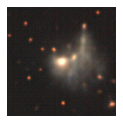

In [13]:
gridplot(1,1,samples_to_images(ori_gal))